# Exploring Pokemons' abilities and stats

## Gathering

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
pokemon_df = pd.read_csv('pokemon.csv')

In [27]:
pokemon_df.head()

,pokedex_number,name,classfication,type1,type2,generation,is_legendary,ability 1,ability 2,ability 3,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,Seed Pokemon,grass,poison,1,0,Overgrow,Chlorophyll,NaN,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,Seed Pokemon,grass,poison,1,0,Overgrow,Chlorophyll,NaN,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,Seed Pokemon,grass,poison,1,0,Overgrow,Chlorophyll,NaN,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,Lizard Pokemon,fire,NaN,1,0,Blaze,Solar Power,NaN,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,Flame Pokemon,fire,NaN,1,0,Blaze,Solar Power,NaN,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


In [28]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pokedex_number     801 non-null    int64  
 1   name               801 non-null    object 
 2   classfication      801 non-null    object 
 3   type1              801 non-null    object 
 4   type2              417 non-null    object 
 5   generation         801 non-null    int64  
 6   is_legendary       801 non-null    int64  
 7   ability 1          801 non-null    object 
 8   ability 2          692 non-null    object 
 9   ability 3          447 non-null    object 
 10  ability 4          20 non-null     object 
 11  ability 5          13 non-null     object 
 12  ability 6          13 non-null     object 
 13  height_m           781 non-null    float64
 14  weight_kg          781 non-null    float64
 15  capture_rate       801 non-null    object 
 16  percentage_male    703 non

In [29]:
pokemon_df.describe()

,pokedex_number,generation,is_legendary,height_m,weight_kg,percentage_male,experience_growth,attack,defense,speed,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
count,801.000000,801.000000,801.000000,781.000000,781.000000,703.000000,8.010000e+02,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,401.000000,3.690387,0.087391,1.163892,61.378105,55.155761,1.054996e+06,77.857678,73.008739,66.334582,...,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365
std,231.373075,1.930420,0.282583,1.080326,109.354766,20.261623,1.602558e+05,32.158820,30.769159,28.907662,...,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562
min,1.000000,1.000000,0.000000,0.100000,0.100000,0.000000,6.000000e+05,5.000000,5.000000,5.000000,...,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000
25%,201.000000,2.000000,0.000000,0.600000,9.000000,50.000000,1.000000e+06,55.000000,50.000000,45.000000,...,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000
50%,401.000000,4.000000,0.000000,1.000000,27.300000,50.000000,1.000000e+06,75.000000,70.000000,65.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,601.000000,5.000000,0.000000,1.500000,64.800000,50.000000,1.059860e+06,100.000000,90.000000,85.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,801.000000,7.000000,1.000000,14.500000,999.900000,100.000000,1.640000e+06,185.000000,230.000000,180.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## Analyzing

### Pokemon popularity by generation

In [30]:
base_color = sns.color_palette()[0]

In [31]:
gen_order = pokemon_df['generation'].value_counts().index

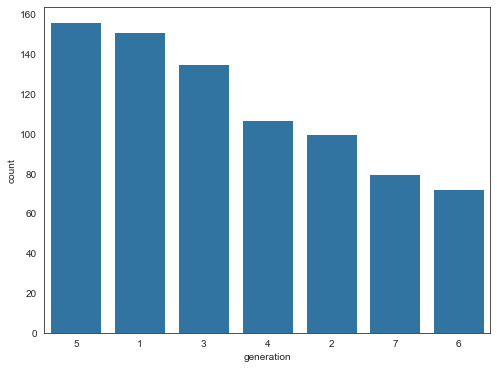

In [32]:
sns.countplot(data = pokemon_df, x = 'generation', color = base_color, order = gen_order);

The most common generation among all Pokemons is generation 5 and the least common is 6

### Pokemon's attack & defense by generation

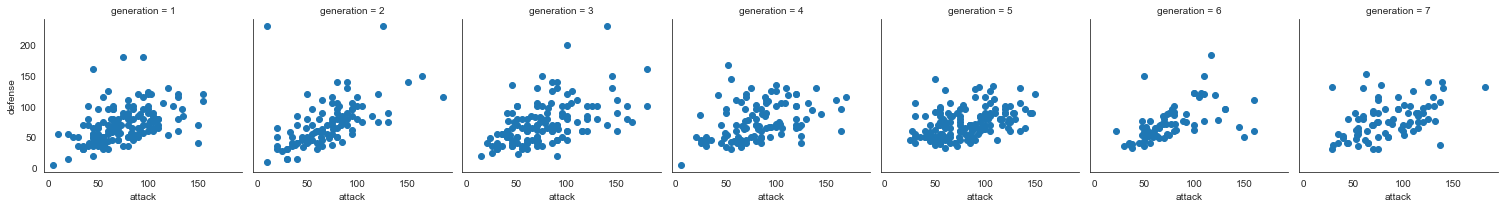

In [33]:
gen = sns.FacetGrid(data = pokemon_df, col = 'generation')
gen.map(plt.scatter, 'attack', 'defense')

There is no correlation between Pokemon's generation and attack, defense

### Pokemon popularity by type

In [34]:
type_counts = pokemon_df['type1'].value_counts()
type1_order = pokemon_df['type1'].value_counts().index

In [35]:
n_pokemon = pokemon_df.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.14232209737827714


In [36]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

In [37]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6

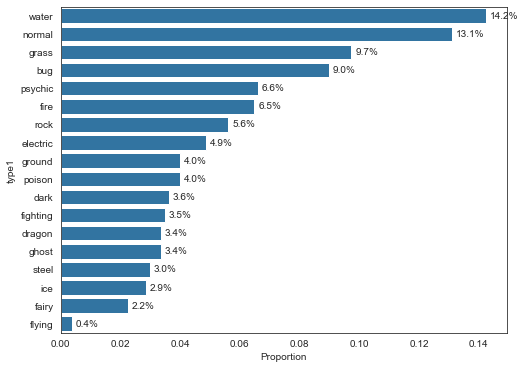

In [38]:
sns.countplot(data = pokemon_df, y = 'type1', color = base_color, order = type1_order);
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('Proportion') 

for i in range (type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')

### Most popular abilities among water pokemons

In [39]:
water_pokemon = pokemon_df[pokemon_df['type1']=='water']

In [40]:
water_ability = water_pokemon['ability 1'].value_counts()

In [41]:
water_ability = water_ability.to_frame()
water_ability = water_ability.reset_index()
water_ability = water_ability.rename(columns = {'index':'ability', 'ability 1':'no. of pokemon'})

In [42]:
water_ability.head()

,ability,no. of pokemon
0,Swift Swim,22
1,Torrent,21
2,Water Absorb,8
3,Oblivious,5
4,Damp,4


C:\Users\janeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

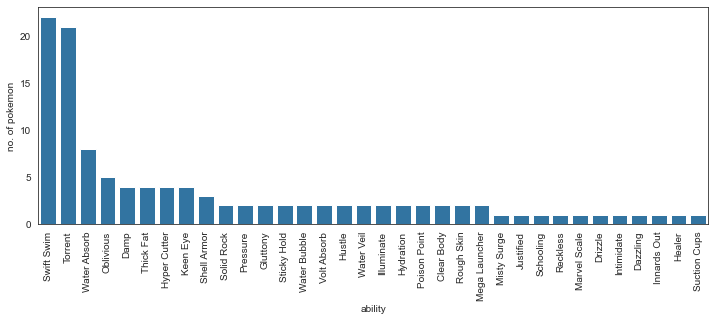

In [43]:
x = water_ability['ability']
y = water_ability['no. of pokemon']
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x, y, color = base_color)
plt.xticks(rotation = 90)

# Pokemon's speed relationship with defense and special defense

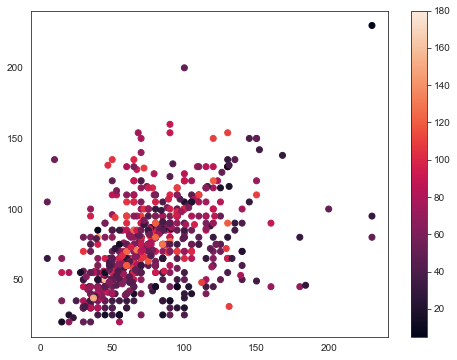

In [44]:
plt.scatter(data = pokemon_df, x = 'defense', y = 'sp_defense', c = 'speed')
plt.colorbar()

### Pokemon's stats

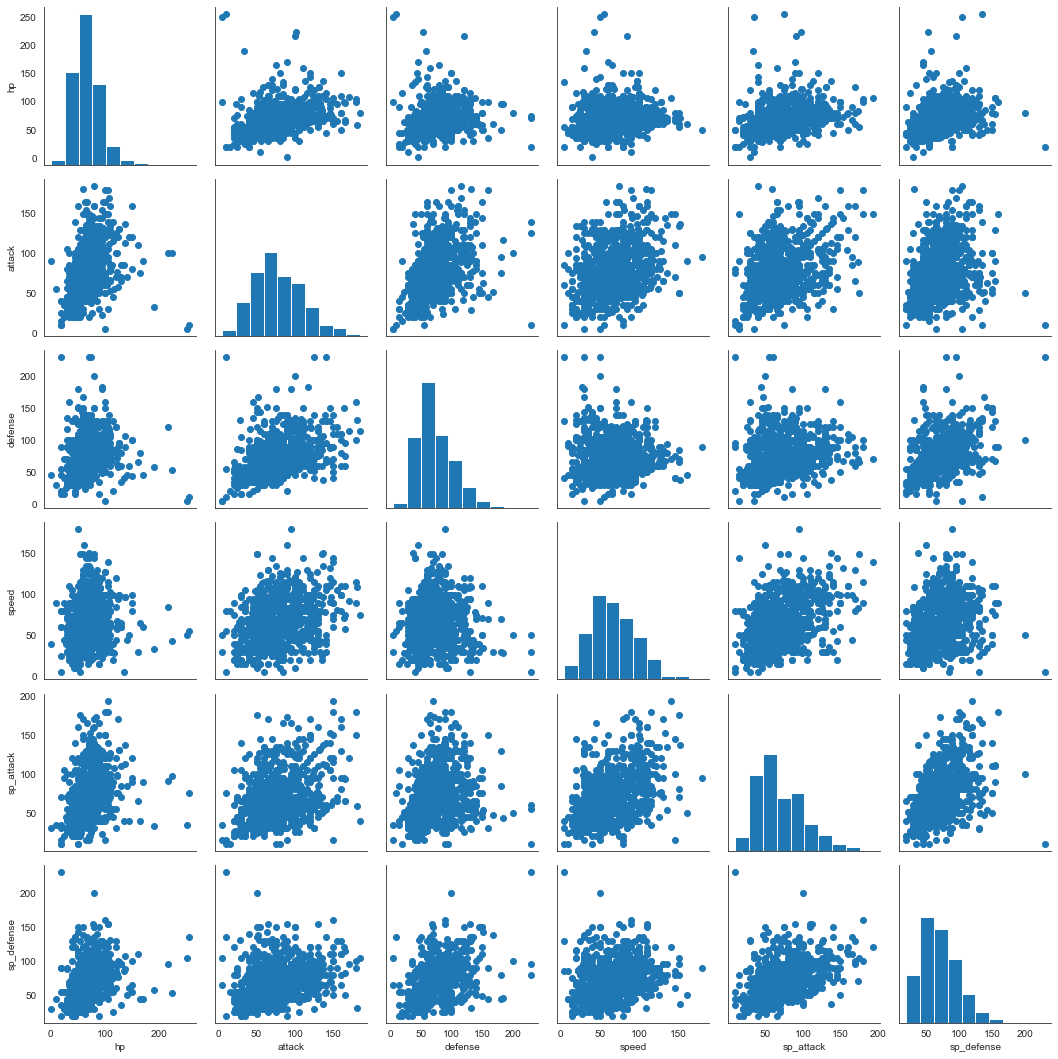

In [45]:
pokemon_stats = ['hp','attack','defense','speed','sp_attack','sp_defense']
stats = sns.PairGrid(data = pokemon_df, vars = pokemon_stats)
stats = stats.map_offdiag(plt.scatter);
stats.map_diag(plt.hist);

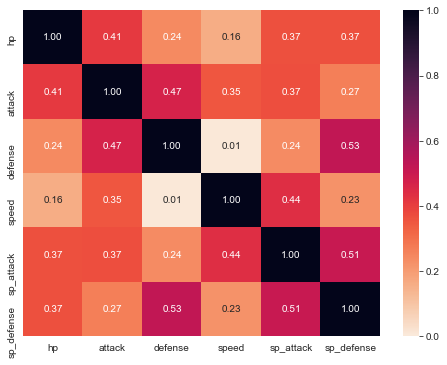

In [46]:
sns.heatmap(pokemon_df[pokemon_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0);

### Pokemon's offensive & defensive

In [47]:
pokemon_df['attack_ratio'] = pokemon_df['attack']/pokemon_df['sp_attack']
pokemon_df['defense_ratio'] = pokemon_df['defense']/pokemon_df['sp_defense']

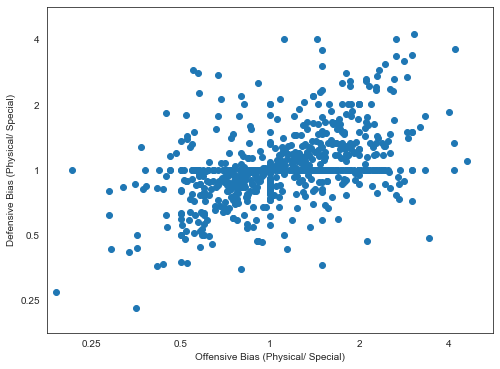

In [48]:
plt.scatter(data = pokemon_df, x = 'attack_ratio', y = 'defense_ratio')
plt.xlabel('Offensive Bias (Physical/ Special)')
plt.ylabel('Defensive Bias (Physical/ Special)')
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25, 0.5, 1, 2 ,4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc);
plt.xlim(2 ** -2.5, 2 ** 2.5 )
plt.ylim(2 ** -2.5, 2 ** 2.5 );